In [2]:
import numpy as np
import math
import random
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Part I
### Forward Simulation and Logistic Regression

**FORWARD SIMULATION**

In [3]:
alpha=0.9 # Probability parameter alpha in (0.5, 1) for P(Z|C)
beta=0.2  # Transition probability parameter for moving to and from parallel processing
gamma=0.1  # Transition probability parameter between states
lmda=(1, 5)  # Rate parameters for the Poisson distribution modeling spike counts under each attention state.

# Transition probability matrix for the HMM, parameterized by gamma and beta (Transition probabilities of switching between states C in {0, 1, 2}).
Gamma = np.array([[1-gamma, 0, gamma], [0, 1-gamma, gamma], [beta*0.5, beta*0.5, 1-beta]])
Z_prob = [[alpha, 1-alpha], [1-alpha, alpha], [0.5, 0.5]]

def forward_sim(n, T, alpha=0.9, gamma=0.1, beta=0.2, lmda=(1, 5)): 
    # Pre-defined (transition) probabilities
    Gamma = [[1-gamma, 0, gamma], [0, 1-gamma, gamma], [beta*0.5, beta*0.5, 1-beta]]
    

    # Initialize arrays
    C = np.zeros(T, dtype=int)
    Z = np.zeros((T, n), dtype=int)
    X = np.zeros((T, n), dtype=int)

    # Initial state
    C_0 = 2

    # Initialize X and Z for t=0
    for i in range(0, n):
            Z[0, i] = random.choices([0, 1], Z_prob[C[0]])[0]
            X[0, i] = np.random.poisson(lam = lmda[Z[0, i]])

    C[0] = random.choices([0, 1, 2], Gamma[C_0])[0]
    # Simulate the proces for the remaining t=1 to t=T timesteps
    for t in range(1, T):
        C[t] = random.choices([0, 1, 2], Gamma[C[t-1]])[0]
        for i in range(0, n):
            Z[t, i] = random.choices([0, 1], Z_prob[C[t]])[0]
            X[t, i] = np.random.poisson(lam = lmda[Z[t, i]])

    return C, Z, X

**VISUALIZATION**

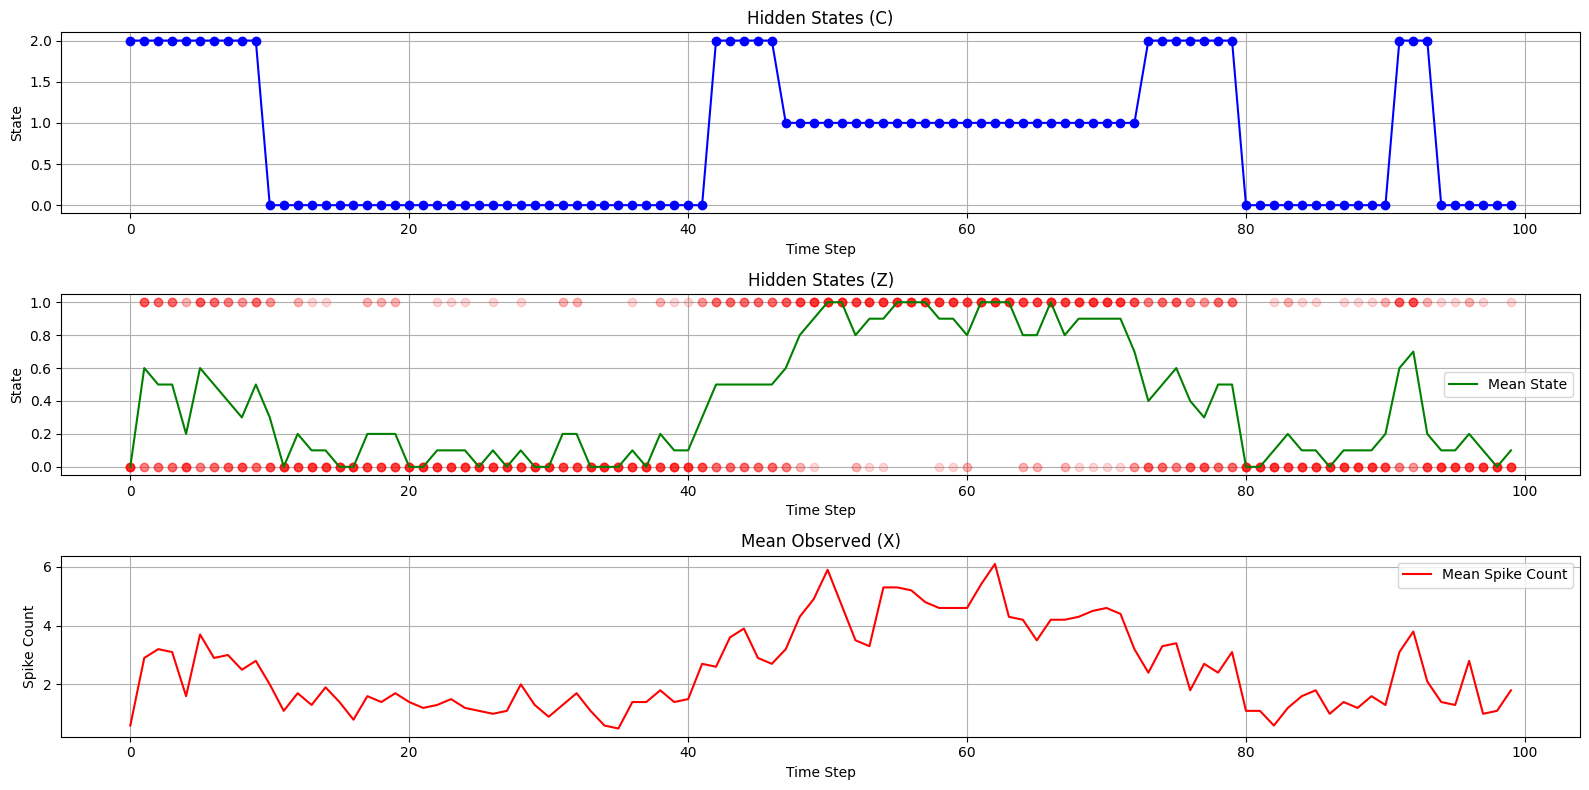

In [4]:
T = 100  # Time period
n = 10   # Number of neurons

C, Z, X = forward_sim(n, T)

#mean Z pr tid
avg_Z = np.mean(Z,axis=1).reshape(1,-1)[0]
avg_X = np.mean(X,axis=1).reshape(1,-1)[0]

# Visualize the data
plt.figure(figsize=(16, 8))

# Plot hidden states (C)
plt.subplot(3, 1, 1)
plt.plot(range(T), C, marker='o', color='blue')
plt.title('Hidden States (C)')
plt.xlabel('Time Step')
plt.ylabel('State')
plt.grid(True)

# Plot observed states (Z)
plt.subplot(3, 1, 2)
for i in range(n):
    plt.plot(range(T), Z[:, i], marker='o', alpha=1.5/n, color = 'red', linewidth = 0)
plt.plot(range(T), avg_Z, color='green', label = 'Mean State')
plt.title('Hidden States (Z)')
plt.xlabel('Time Step')
plt.ylabel('State')
plt.legend()
plt.grid(True)

# Plot observed states (X)
plt.subplot(3, 1, 3)
plt.plot(range(T), avg_X, color='red', label = 'Mean Spike Count')
plt.title('Mean Observed (X)')
plt.xlabel('Time Step')
plt.ylabel('Spike Count')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

### MULTICLASS LOGISTIC REGRESSION 

In [5]:
# Split the date for validation
X_train, X_test, C_train, C_test = train_test_split(X, C, test_size=0.2, random_state=42)

# Assert shapes
assert(X_train.shape == (T-0.2*T, n))
assert(X_test.shape == (0.2*T, n))
assert(C_train.shape == (T-0.2*T, ))
assert(C_test.shape == (0.2*T, ))

In [6]:
# Train multinomial logistic regression using Scikit-Learn
LogReg = LogisticRegression(random_state=42, multi_class='multinomial')

LogReg.fit(X_train, C_train)
LogReg.score(X_test, C_test)

c:\Users\Kaest\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.75

In [7]:
# Predict_proba essentially returns the CPD for P(C|X)
LogReg.predict_proba(X)

array([[9.99973042e-01, 1.93571456e-11, 2.69579729e-05],
       [1.00158735e-01, 1.20277302e-02, 8.87813534e-01],
       [1.45035481e-03, 2.24024953e-02, 9.76147150e-01],
       [3.72863724e-02, 7.16964483e-02, 8.91017179e-01],
       [3.55552766e-01, 1.79804603e-05, 6.44429253e-01],
       [8.89787546e-05, 4.20365060e-01, 5.79545962e-01],
       [1.98414853e-02, 3.22285931e-02, 9.47929922e-01],
       [2.78895744e-02, 2.53024369e-01, 7.19086056e-01],
       [4.33689500e-02, 2.91933061e-05, 9.56601857e-01],
       [1.31320958e-03, 9.76235251e-05, 9.98589167e-01],
       [9.68784025e-01, 1.99139269e-06, 3.12139832e-02],
       [9.99466926e-01, 2.39363705e-09, 5.33071605e-04],
       [9.53096259e-01, 5.48789900e-06, 4.68982529e-02],
       [9.96902357e-01, 3.52782317e-08, 3.09760765e-03],
       [7.83143037e-01, 9.39904794e-05, 2.16762973e-01],
       [9.92485155e-01, 1.60052600e-07, 7.51468446e-03],
       [9.99626512e-01, 1.30628264e-09, 3.73487119e-04],
       [9.57151836e-01, 3.46201

# Part II
### Inference algorithms, Testing Inference on Simulated Data

**INFERENCE OF Z**

In [8]:
def PX_given_Z(x, z, lmda=(1, 5)):
    return (np.exp(-1 * lmda[z]) * ((lmda[z]**x)/math.factorial(x)))

# Returns the answer to the query P(X=x|Z=z)

In [9]:
T = 100  # Time period
n = 10   # Number of neurons


C, Z, X = forward_sim(n, T)

In [10]:
#We assume that P(Z=0) = 0.5 due to the distribution of Z | C, and due to an assumption that P(C=1) = P(C=0)
Z_marg = (0.5, 0.5)


#We start by calculating P(X) for every observed X and save them in a table. It doesn't make sense to compute P(X) for unobserved values of X
X_marg = np.zeros(np.max(X)+1)
#We calculate P(X) using the formula: P(X=x) = P(X=x|Z=0)P(Z=0) + P(X=x|Z=1)P(Z=1)
#This works because Z ony takes values in {0,1}. We simply obtain the joint distribution P(X,Z) and sum out Z
for i in range(len(X_marg)):
    X_marg[i] = PX_given_Z(i, 0)*Z_marg[0] + PX_given_Z(i, 1)*Z_marg[1]


#X_marg[i] holds the answer for the query P(X=i)
#Likewise Z_marg[i] holds the answer for the query p(Z=i)
    

In [11]:
Z_inferred = np.zeros((T,n,2), dtype=float) 
#For every observed X=x, we calculate the conditional probaility P(Z=0|X=x)
#We use Bayes theorem to do this. 

for i in range(Z_inferred.shape[0]): 
    for j in range(Z_inferred.shape[1]): 
        Z_inferred[i,j,0] = (PX_given_Z(X[i,j], 0)*Z_marg[0])/(X_marg[X[i,j]])
        Z_inferred[i,j,1] = 1 - Z_inferred[i,j,0] 

In [12]:
def PZ_given_C(c, z, alpha=0.9):
    Z_prob = np.array([[alpha, 1-alpha], [1-alpha, alpha], [0.5, 0.5]])
    return Z_prob[c, z]

### Forward Algorithm

In [13]:
def calc_emission_proba(t: int, c: int) -> float:
    """
    Calculates the emission probabilities at timestep t
    The probabilities given by P(X_1,t...X_n,t|C_t)
    P(Z|C) by function PZ_given_C(c, z)
    P(X|Z) Poisson distribution given by PX_given_Z(x, z)
    """
    emission_proba = 0.
    for i in range(n):
        emission_proba += np.log(PZ_given_C(c, 0)*PX_given_Z(X[t, i], 0) + PZ_given_C(c, 1)*PX_given_Z(X[t, i], 1))
    emission_proba = np.exp(emission_proba)
    return emission_proba

In [14]:
def forward():
    """
    Iteratively updates the Alpha_t vectors in the Alpha matrix.
    The Alpha matrix represents the P(C|X) distribution for each timestep T as an T x 3 matrix.
    """
    # Initialization of the forward probabilities matrix, Alpha.
    Alpha = np.zeros((T, 3), dtype=float)  # T x 3 matrix P(C|X)
    Alpha[0, 2] = 1.  # Assumed state C_0=2 becomes our Alpha_0 vector (Alpha_0=[0, 0, 1])
    for t in range(1, T):
        for c in range(3):
            c_prev = 0. # For calculating SUM_c_t-1 P(C_t|c_t-1)*Alpha_t-1(c_t-1)
            for c_ in range(3):
                c_prev += Gamma[c_, c]*Alpha[t-1, c_]
            Alpha[t, c] = calc_emission_proba(t, c)*c_prev # Alpha_t = P(X_1,t,...,X_n,t|C_t) * SUM_c_t-1 P(C_t|c_t-1)*Alpha_t-1(c_t-1)
        row_sum = np.sum(Alpha[t], axis=0) # Normalizing sum for each row
        Alpha[t] = Alpha[t]/row_sum # Row-wise normalization for the CPD, normalizing the unnormalized Gibbs measure of each row.
    return Alpha

In [15]:
Alpha = forward() # Store P(C|X) in an T x 3 matrix.

In [16]:
Alpha[30:50] # P(C|X) of the 19 timesteps t=30 to t=49

array([[9.80095591e-01, 2.11340488e-07, 1.99041979e-02],
       [9.35988576e-02, 2.96625173e-03, 9.03434891e-01],
       [1.60802435e-03, 1.51064522e-02, 9.83285523e-01],
       [5.92950157e-02, 2.23661303e-04, 9.40481323e-01],
       [4.85507660e-05, 3.64255241e-01, 6.35696208e-01],
       [1.08091548e-03, 2.59252148e-01, 7.39666936e-01],
       [1.46832843e-05, 3.96857721e-01, 6.03127596e-01],
       [7.13700113e-09, 9.91547380e-01, 8.45261316e-03],
       [1.09622280e-08, 9.84401328e-01, 1.55986608e-02],
       [2.70125054e-08, 9.85663236e-01, 1.43367366e-02],
       [1.55528273e-05, 5.31104169e-01, 4.68880278e-01],
       [1.42028692e-05, 7.84843936e-01, 2.15141861e-01],
       [9.31256499e-06, 8.30521266e-01, 1.69469421e-01],
       [1.04343743e-03, 2.80702221e-01, 7.18254341e-01],
       [1.58266447e-04, 2.52967699e-01, 7.46874035e-01],
       [1.64910050e-02, 1.38999339e-02, 9.69609061e-01],
       [1.04210612e-01, 3.48287410e-04, 8.95441101e-01],
       [2.70794373e-02, 6.20434

In [17]:
C[30:50] # Simulated values of the hidden layer C from t=30 to t=49

array([0, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1])